# Regression parameters
LRGs (DR1) with DR2 method

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import fitsio

In [28]:
dir = Path("/pscratch/sd/d/dchebat/imsys_fastload/Y1/LSS/iron/LSScats/v1.5/")

def read_params(filepath):
    with open(filepath, 'r') as file:
        new_single = file.read().strip().split()
    return {name:float(val) for name, val in zip(new_single[::2], new_single[1::2])}

In [29]:
with open("/pscratch/sd/d/dchebat/imsys_fastload/Y1/LSS/iron/LSScats/v1.5/LRG_S_1.1_1.2_linfitparam_new_single.txt", 'r') as file:
    new_single = file.read().strip().split()
    {name:float(val) for name, val in zip(new_single[::2], new_single[1::2])}

In [30]:
test = read_params("/pscratch/sd/d/dchebat/imsys_fastload/Y1/LSS/iron/LSScats/v1.5/LRG_S_1.1_1.2_linfitparam_new_single.txt")

In [31]:
name_to_idx = {name:idx for idx, name in enumerate(test.keys())}

In [32]:
name_to_idx

{'constant': 0,
 'STARDENS': 1,
 'PSFSIZE_G': 2,
 'PSFSIZE_R': 3,
 'PSFSIZE_Z': 4,
 'GALDEPTH_G': 5,
 'GALDEPTH_R': 6,
 'GALDEPTH_Z': 7,
 'HI': 8,
 'PSFDEPTH_W1': 9,
 'EBV_DIFF_GR': 10,
 'EBV_DIFF_RZ': 11}

Text(0.5, 0.98, 'Best-fit parameters for all LRG bins and regions, with both methods')

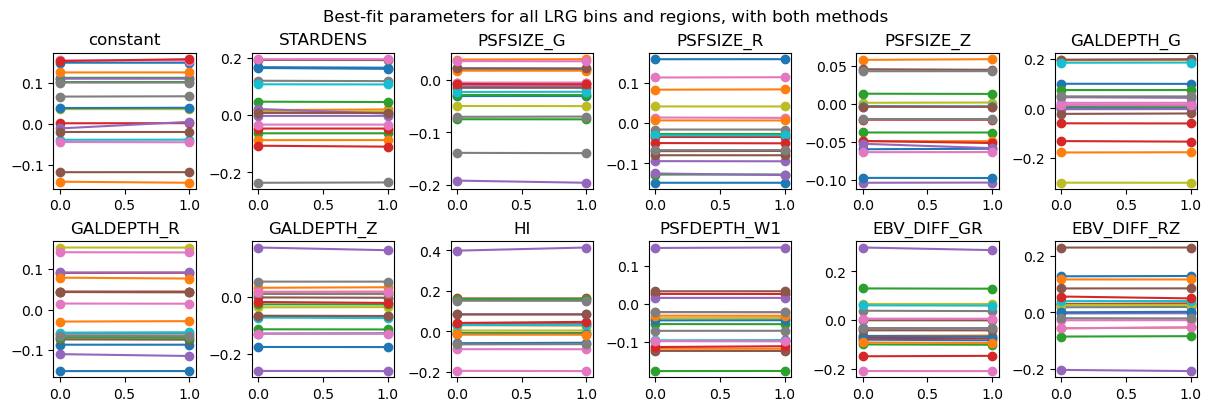

In [33]:
fig, axes = plt.subplots(2, 6, layout="constrained", figsize=(12, 4))
flataxes = axes.flatten()
for single in dir.glob("*new_single.txt"):
    # singledict = read_params(single)
    # doubledict = read_params(str(single).replace("single", "double"))
    defstratdict = read_params(str(single).replace("new_single", "jax"))
    old = str(str(single)[:-31] + str(single)[-30:]).replace("new_single", "old")
    olddict = read_params(old)
    for name in defstratdict.keys():
        x = name_to_idx[name]
        flataxes[x].plot([0, 1], [olddict[name], defstratdict[name]], marker='o')
for name in defstratdict.keys():
    x = name_to_idx[name]
    flataxes[x].set_title(name)

fig.suptitle("Best-fit parameters for all LRG bins and regions, with both methods")

Text(0.5, 0.98, 'Best-fit parameters for all LRG bins and regions, new - old')

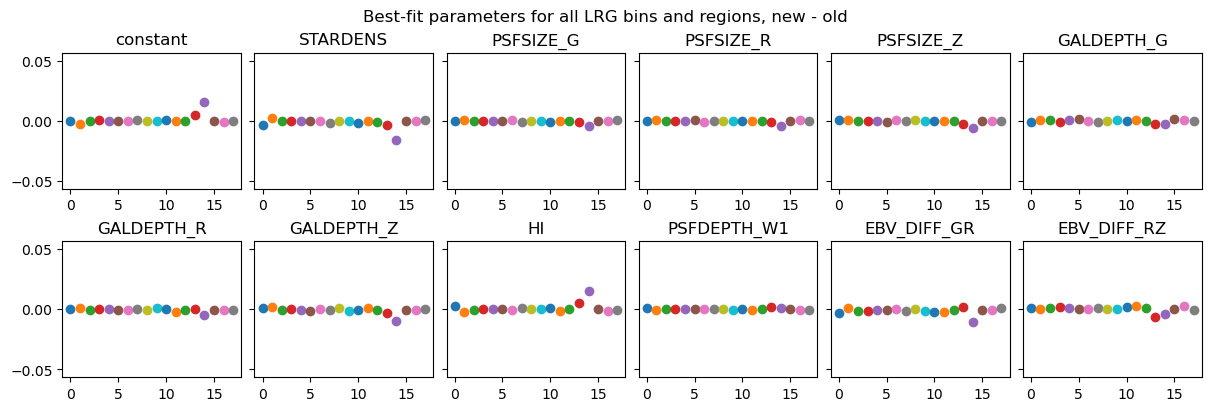

In [34]:
fig, axes = plt.subplots(2, 6, layout="constrained", figsize=(12, 4), sharey=True)
flataxes = axes.flatten()
for idx, single in enumerate(dir.glob("*new_single.txt")):
    # singledict = read_params(single)
    # doubledict = read_params(str(single).replace("single", "double"))
    defstratdict = read_params(str(single).replace("new_single", "jax"))
    old = str(str(single)[:-31] + str(single)[-30:]).replace("new_single", "old")
    olddict = read_params(old)
    for name in defstratdict.keys():
        x = name_to_idx[name]
        flataxes[x].scatter(idx, defstratdict[name] - olddict[name], marker='o')
for name in defstratdict.keys():
    x = name_to_idx[name]
    flataxes[x].set_title(name)

axes[0][0].set_ylim(-0.05651280483125267, 0.05640027968737128)

fig.suptitle("Best-fit parameters for all LRG bins and regions, new - old")
# print(axes.flatten()[1].get_ylim())

## QSO DR2 v2

In [20]:
dir = Path("/pscratch/sd/d/dchebat/imsys_fastload/Y3/LSS/loa-v1/LSScats/v2/")
test = read_params(dir / "QSO_DES_0.81.3_linfitparam.txt")
name_to_idx = {name:idx for idx, name in enumerate(test.keys())}
name_to_idx

{'constant': 0,
 'PSFDEPTH_W1': 1,
 'PSFDEPTH_W2': 2,
 'STARDENS': 3,
 'PSFSIZE_G': 4,
 'PSFSIZE_R': 5,
 'PSFSIZE_Z': 6,
 'PSFDEPTH_G': 7,
 'PSFDEPTH_R': 8,
 'PSFDEPTH_Z': 9,
 'EBV_DIFF_GR': 10,
 'EBV_DIFF_RZ': 11,
 'HI': 12}

Text(0.5, 0.98, 'Best-fit parameters for all QSO bins and regions, with old and new method')

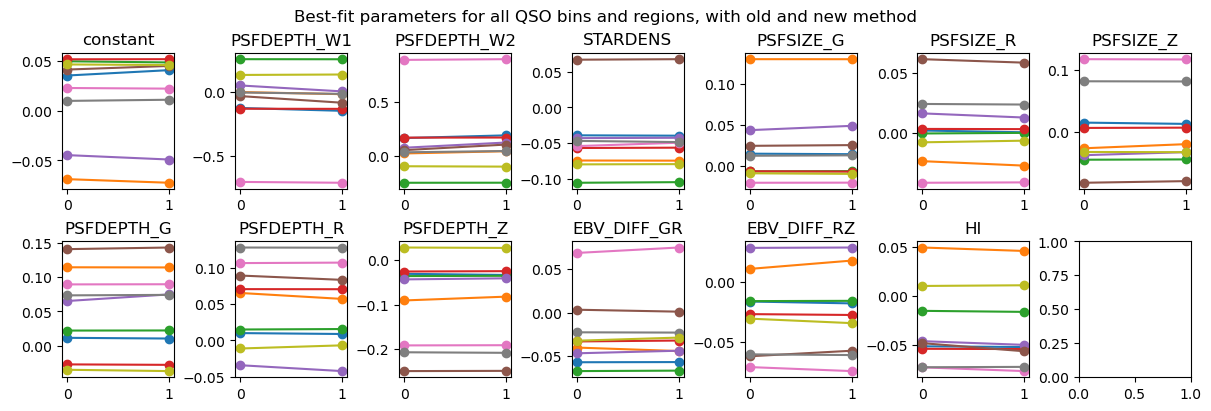

In [21]:
fig, axes = plt.subplots(2, 7, layout="constrained", figsize=(12, 4))
flataxes = axes.flatten()
for single in dir.glob("QSO_*linfitparam_jax.txt"):
    singledict = read_params(single)
    old = str(str(single)[:-24] + str(single)[-23:]).replace("_jax", "")
    olddict = read_params(old)
    for name in singledict.keys():
        x = name_to_idx[name]
        flataxes[x].plot([0, 1], [olddict[name], singledict[name]], marker='o')
for name in singledict.keys():
    x = name_to_idx[name]
    flataxes[x].set_title(name)

fig.suptitle("Best-fit parameters for all QSO bins and regions, with old and new method")

(-0.05651280483125267, 0.05640027968737128)


Text(0.5, 0.98, 'Best-fit parameters for all QSO bins and regions, new - old')

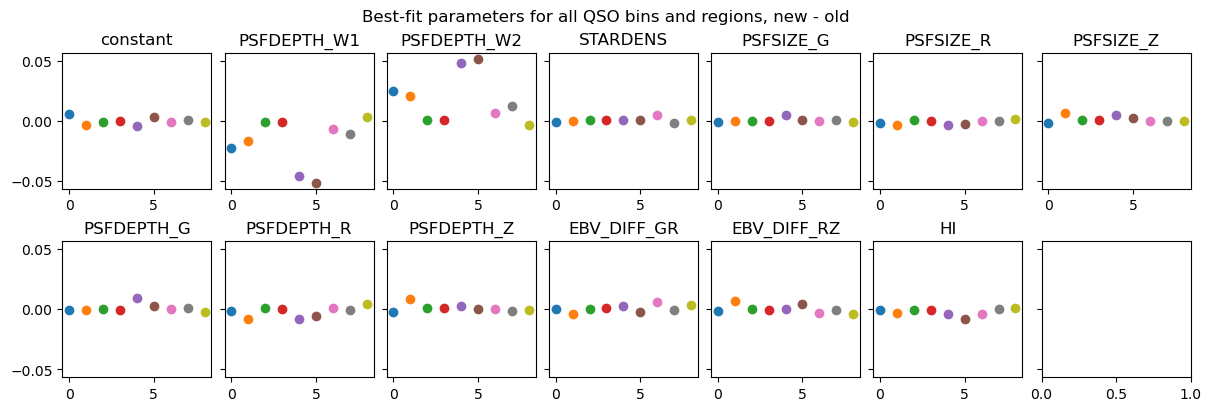

In [25]:
fig, axes = plt.subplots(2, 7, layout="constrained", figsize=(12, 4), sharey=True)
flataxes = axes.flatten()
for idx, single in enumerate(dir.glob("QSO_*linfitparam_jax.txt")):
    singledict = read_params(single)
    old = str(str(single)[:-24] + str(single)[-23:]).replace("_jax", "")
    olddict = read_params(old)
    for name in singledict.keys():
        x = name_to_idx[name]
        flataxes[x].scatter(idx, singledict[name] - olddict[name], marker='o')
for name in singledict.keys():
    x = name_to_idx[name]
    flataxes[x].set_title(name)

print(axes[0][0].get_ylim())

fig.suptitle("Best-fit parameters for all QSO bins and regions, new - old")

# Compare weights

In [26]:
from LSS.common_tools import goodz_infull, select_regressis_DES

In [27]:
jaxweights_LRG = np.load("/pscratch/sd/d/dchebat/reproducelinweights/jax.npy") 
jaxweights_QSO = np.load("/pscratch/sd/d/dchebat/reproducelinweights/jax_QSO.npy")

In [28]:
# datacats = np.concatenate([fitsio.read(f"/dvs_ro/cfs/cdirs/desi/survey/catalogs/Y3/LSS/loa-v1/LSScats/v2/LRG_{letter}GC_clustering.dat.fits") for letter in ["N", "S"]])
fullcat_LRG = fitsio.read("/dvs_ro/cfs/cdirs/desi/survey/catalogs/Y3/LSS/loa-v1/LSScats/v2/LRG_full_HPmapcut.dat.fits")
fullcat_QSO = fitsio.read("/dvs_ro/cfs/cdirs/desi/survey/catalogs/Y3/LSS/loa-v1/LSScats/v2/QSO_full_HPmapcut.dat.fits")

In [29]:
fullmask = (fullcat_LRG["ZWARN"] != 9999) & goodz_infull("LRG", fullcat_LRG)
masked_fullcat_LRG = fullcat_LRG[fullmask]

fullmask = (fullcat_QSO["ZWARN"] != 9999) & goodz_infull("QSO", fullcat_QSO)
masked_fullcat_QSO = fullcat_QSO[fullmask]

In [30]:
diff_LRG = masked_fullcat_LRG["WEIGHT_IMLIN"]/jaxweights_LRG
diff_QSO = masked_fullcat_QSO["WEIGHT_IMLIN"]/jaxweights_QSO

In [32]:
DESsel = (masked_fullcat_QSO["PHOTSYS"] == "S") & select_regressis_DES(masked_fullcat_QSO)

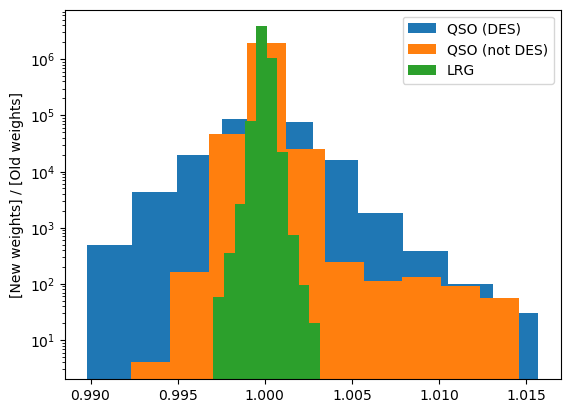

In [36]:
plt.hist(diff_QSO[DESsel], label="QSO (DES)")
plt.hist(diff_QSO[~DESsel], label="QSO (not DES)")
plt.hist(diff_LRG, label="LRG") #, density=True)
plt.yscale("log")
plt.ylabel("[New weights] / [Old weights]")
plt.legend()
plt.savefig("histograms.webp", transparent=False)

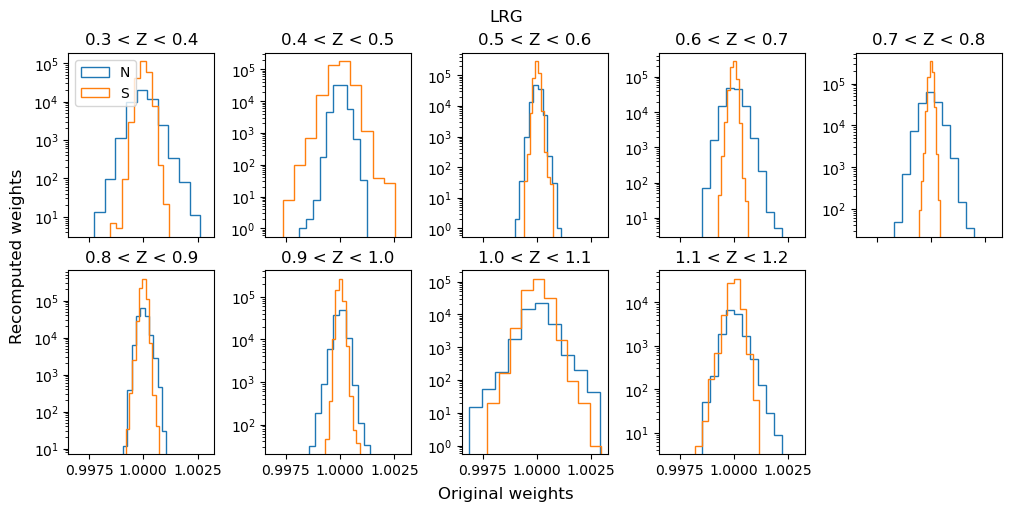

In [29]:
fig, axes = plt.subplots(2, 5, layout="constrained", figsize=(10, 5), sharex=True, sharey=False)
dz = 0.1
zedges = np.arange(0.3, 1.21, dz)

northsel = (masked_fullcat_LRG["PHOTSYS"] == "N")
southsel = (masked_fullcat_LRG["PHOTSYS"] == "S")

for zmin, ax in zip(zedges[:-1], axes.flatten()):
    # ax.ticklabel_format(axis='y', style='scientific', scilimits=[-3, 3])
    ax.set_yscale("log")
    zsel = (masked_fullcat_LRG["Z_not4clus"] > zmin) & (masked_fullcat_LRG["Z_not4clus"] < zmin + dz)
    ax.hist(jaxweights_LRG[zsel & northsel] / masked_fullcat_LRG["WEIGHT_IMLIN"][zsel & northsel], label="N", histtype='step')
    ax.hist(jaxweights_LRG[zsel & southsel] / masked_fullcat_LRG["WEIGHT_IMLIN"][zsel & southsel], label="S", histtype='step')
    ax.set_title(f"{zmin:.1f} < Z < {zmin+dz:.1f}")

axes.flatten()[0].legend()
axes.flatten()[-1].set_axis_off()

fig.supxlabel("Original weights")
fig.supylabel("Recomputed weights")
fig.suptitle("LRG")
fig.savefig("LRG_histograms.webp", transparent=False)

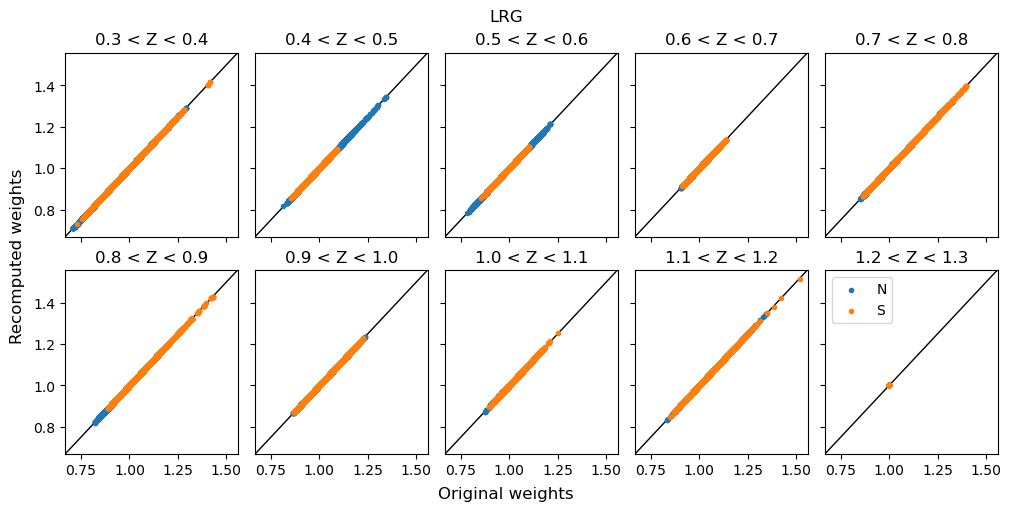

In [30]:
fig, axes = plt.subplots(2, 5, layout="constrained", figsize=(10, 5), sharex=True, sharey=True)
dz = 0.1
zedges = np.arange(0.3, 1.31, dz)

northsel = (masked_fullcat_LRG["PHOTSYS"] == "N")
southsel = (masked_fullcat_LRG["PHOTSYS"] == "S")

for zmin, ax in zip(zedges[:-1], axes.flatten()):
    zsel = (masked_fullcat_LRG["Z_not4clus"] > zmin) & (masked_fullcat_LRG["Z_not4clus"] < zmin + dz)
    ax.axline((1, 1), slope=1, color='k', zorder=-1, linewidth=1)
    ax.scatter(masked_fullcat_LRG["WEIGHT_IMLIN"][zsel & northsel], jaxweights_LRG[zsel & northsel], marker=".", label="N")
    ax.scatter(masked_fullcat_LRG["WEIGHT_IMLIN"][zsel & southsel], jaxweights_LRG[zsel & southsel], marker=".", label="S")
    ax.set_title(f"{zmin:.1f} < Z < {zmin+dz:.1f}")

axes.flatten()[-1].legend()

fig.supxlabel("Original weights")
fig.supylabel("Recomputed weights")
fig.suptitle("LRG")
fig.savefig("LRG_scatter.webp", transparent=False)

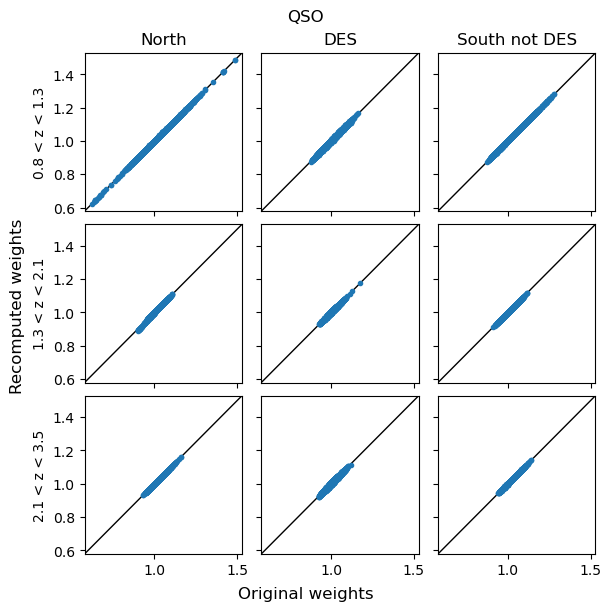

In [31]:
fig, axes = plt.subplots(3, 3, layout="constrained", figsize=(6, 6), sharex=True, sharey=True)
zranges = [[0.8, 1.3], [1.3, 2.1], [2.1, 3.5]]

northsel = (masked_fullcat_QSO["PHOTSYS"] == "N")
southsel = (masked_fullcat_QSO["PHOTSYS"] == "S")
DESsel = southsel & select_regressis_DES(masked_fullcat_QSO)
SnotDESsel = southsel & (~select_regressis_DES(masked_fullcat_QSO))

for zrange, axrow in zip(zranges, axes):
    zmin, zmax = zrange
    zsel = (masked_fullcat_QSO["Z_not4clus"] > zmin) & (masked_fullcat_QSO["Z_not4clus"] < zmin + dz)

    for ax in axrow:
        ax.axline((1, 1), slope=1, color='k', zorder=-1, linewidth=1)
    axrow[0].scatter(masked_fullcat_QSO["WEIGHT_IMLIN"][zsel & northsel], jaxweights_QSO[zsel & northsel], marker=".")
    axrow[1].scatter(masked_fullcat_QSO["WEIGHT_IMLIN"][zsel & DESsel], jaxweights_QSO[zsel & DESsel], marker=".")
    axrow[2].scatter(masked_fullcat_QSO["WEIGHT_IMLIN"][zsel & SnotDESsel], jaxweights_QSO[zsel & SnotDESsel], marker=".")

axes[0, 0].set_title("North")
axes[0, 1].set_title("DES")
axes[0, 2].set_title("South not DES")

for i, zrange in enumerate(zranges):
    axes[i, 0].set_ylabel(f"{zrange[0]:.1f} < z < {zrange[1]:.1f}")

fig.supxlabel("Original weights")
fig.supylabel("Recomputed weights")
fig.suptitle("QSO")
fig.savefig("QSO_scatter.webp", transparent=False)

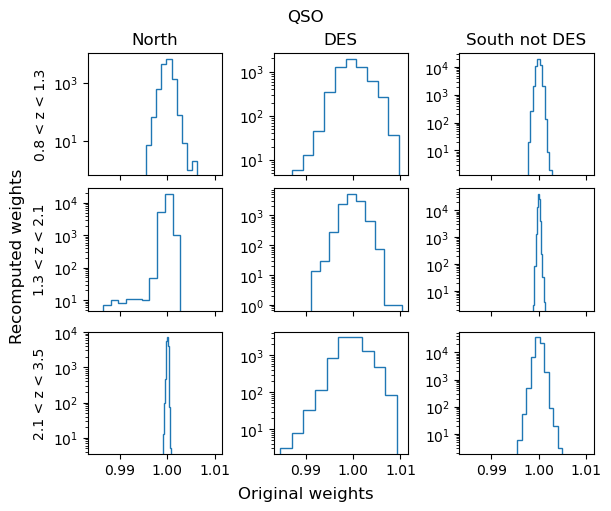

In [32]:
fig, axes = plt.subplots(3, 3, layout="constrained", figsize=(6, 5), sharex=True)
zranges = [[0.8, 1.3], [1.3, 2.1], [2.1, 3.5]]

northsel = (masked_fullcat_QSO["PHOTSYS"] == "N")
southsel = (masked_fullcat_QSO["PHOTSYS"] == "S")
DESsel = southsel & select_regressis_DES(masked_fullcat_QSO)
SnotDESsel = southsel & (~select_regressis_DES(masked_fullcat_QSO))

for zrange, axrow in zip(zranges, axes):
    zmin, zmax = zrange
    zsel = (masked_fullcat_QSO["Z_not4clus"] > zmin) & (masked_fullcat_QSO["Z_not4clus"] < zmin + dz)

    for ax in axrow:
        ax.set_yscale("log")
    axrow[0].hist(jaxweights_QSO[zsel & northsel] / masked_fullcat_QSO["WEIGHT_IMLIN"][zsel & northsel], histtype='step')
    axrow[1].hist(jaxweights_QSO[zsel & DESsel] / masked_fullcat_QSO["WEIGHT_IMLIN"][zsel & DESsel], histtype='step')
    axrow[2].hist(jaxweights_QSO[zsel & SnotDESsel] / masked_fullcat_QSO["WEIGHT_IMLIN"][zsel & SnotDESsel], histtype='step')

axes[0, 0].set_title("North")
axes[0, 1].set_title("DES")
axes[0, 2].set_title("South not DES")

for i, zrange in enumerate(zranges):
    axes[i, 0].set_ylabel(f"{zrange[0]:.1f} < z < {zrange[1]:.1f}")

fig.supxlabel("Original weights")
fig.supylabel("Recomputed weights")
fig.suptitle("QSO")
fig.savefig("QSO_histograms.webp", transparent=False)